# Continuous variables
-  Quantities that can take any value, not just discrete value
- speed train 45.68.. k/hr

## Probability density function (PDF)
- Continuous analog to the PMF

- Mathematical description of the relative likelihood of observing a value of a continuous variable





## Normal PDF
![](https://i.imgur.com/0X2LD1t.png)

### Example
- area under the PDF give probabilities
- greater thatn 300,000 km/s
![](https://i.imgur.com/JzN8rJc.png)

## Normal CDF
- remember: CDF gives the probability the measured speed of light will be less thatn the value on the x-axis

- there is a 97% chance that a speed of light measurement is les thant than
![](https://i.imgur.com/uzTpAAb.png)



# Let’s practice!

# Introduction to the Normal distribution

## Normal distribution
- Describes a continuous variable whose PDF has a single symmetric peak.


- mean determines whre the center of the peak is
- standar deviation measures how wide the peak is, or houw spread pout the data are.
- note:


![](https://i.imgur.com/mBNTdnp.png)

- mean and std are the names of the parameters of the Normai distribution NOT the results from the computed data when doing exploratory data analysis

| Parameter | _ |Calculated from data |
| -------- | -------- | -------- |
| mean of a Normal distribution| $\neq$| mean computed from data|
|st. dev. of a Normal distribution|$\neq$|standard deviation computed from data|



## Comparing data to a Normal PDF
![](https://i.imgur.com/qHE7IOD.png)

---
- comparing the histogram to the PDF suffers form binning bias, so its better to compare theECDF of the data to the theoretical CDF of the Normal Distribution.

To compute the theoretical CDF, we can use `np.random.normal()` to draw samples and then we can compute the CDF


## Checking Normality of Michelson data


In [ ]:
ls data

In [1]:
import pandas as pd
df = pd.read_csv('data/michelson_speed_of_light.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(3)

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles


In [2]:
michelson_speed_of_light = df['velocity of light in air (km/s)']
michelson_speed_of_light[:10]

0    299850
1    299740
2    299900
3    300070
4    299930
5    299850
6    299950
7    299980
8    299980
9    299880
Name: velocity of light in air (km/s), dtype: int64

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [4]:
import numpy as np
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

## Checking Normality of Michelson data


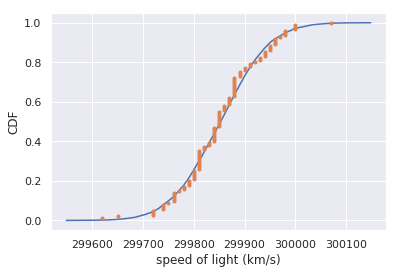

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

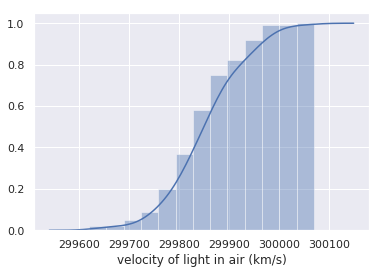

In [7]:
sns.distplot(michelson_speed_of_light,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

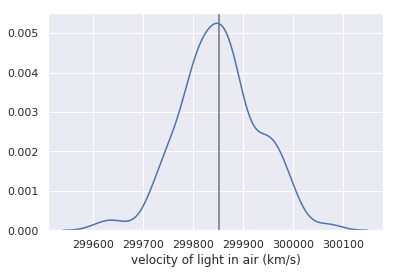

In [19]:
sns.distplot(michelson_speed_of_light,hist=False)
_ = plt.axvline(x=michelson_speed_of_light.mean(), color='0.45', linestyle='-')
plt.show()

In [16]:
michelson_speed_of_light.mean()

299852.4

# Let’s practice!

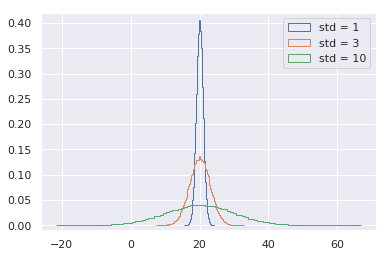

In [20]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)


# Make histograms
_ = plt.hist(samples_std1, density=True, histtype='step', bins=100)
_ = plt.hist(samples_std3, density=True, histtype='step' ,bins=100)
_ = plt.hist(samples_std10, density=True, histtype='step', bins=100)



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

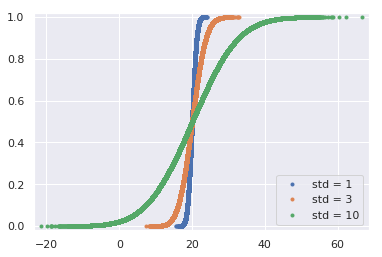

In [21]:
# Generate CDFs

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')

_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

In [ ]:
ls

In [176]:
df = pd.read_csv('data/belmont.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
Year       91 non-null int64
Winner     91 non-null object
Jockey     91 non-null object
Trainer    91 non-null object
Owner      91 non-null object
Time       91 non-null object
Track      91 non-null object
miles      91 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [177]:
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [178]:
df.Time = pd.to_datetime(df.Time).dt.time

In [179]:
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,02:28:30,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",02:26:39,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,02:28:31,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,02:30:42,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,02:30:25,Belmont,1.5


## create new column for total seconds

In [180]:
df['time_in_seconds'] = df.Time.apply(get_sec)

In [181]:
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,time_in_seconds
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,02:28:30,Belmont,1.5,148
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",02:26:39,Belmont,1.5,146
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,02:28:31,Belmont,1.5,148
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,02:30:42,Belmont,1.5,150
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,02:30:25,Belmont,1.5,150


In [174]:
def get_sec(time_str):
    time_str = str(time_str)
    m, s,ms = time_str.split(':')
    return  int(m) * 60 + int(s)

In [182]:
df.time_in_seconds.mean()

148.78021978021977

In [183]:
df.Time.max()

datetime.time(2, 34)

In [184]:
df[df.Winner == 'Secretariat']

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,time_in_seconds
43,1973,Secretariat,Ron Turcotte,Lucien Laurin,Meadow Stable,02:24:00,Belmont,1.5,144


In [172]:
belmont_secretariat = df[df.Winner == 'Secretariat'].time_in_seconds
belmont_secretariat

43    8640
Name: time_in_seconds, dtype: int64

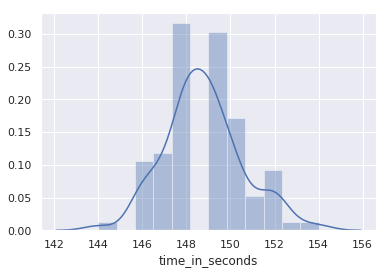

In [185]:
sns.distplot(df.time_in_seconds)

In [186]:
belmont_no_outliers = df.time_in_seconds

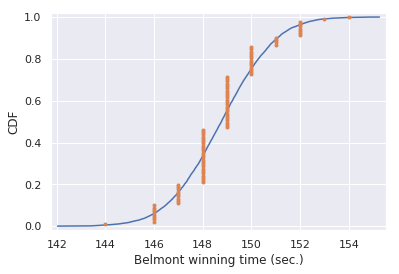

In [187]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x,y = ecdf(belmont_no_outliers)

x_theor,y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [188]:
len(samples)

10000

In [189]:
# Take a million samples out of the Normal distribution: samples

samples = np.random.normal(mu,sigma, size=1000000)
# Compute the fraction that are faster than 144 seconds: prob

prob = np.sum(samples <= belmont_secretariat)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

ValueError: Lengths must match to compare

# The Normal distribution: Properties and warnings

## The Gaussian distribution
![](https://i.imgur.com/Z8x2QAP.png)


## Length of MA large mouth bass

![](https://i.imgur.com/0Hx0nnV.png)



![](https://i.imgur.com/h7V5s95.png)

## Light tails of the Normal distribution


![](https://i.imgur.com/0WUIyX7.png)


# Let’s practice!

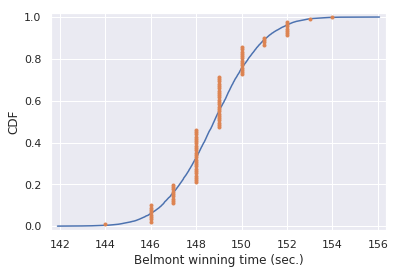

In [190]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x,y = ecdf(belmont_no_outliers)

x_theor,y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [191]:
# Take a million samples out of the Normal distribution: samples

samples = np.random.normal(mu,sigma, size=1000000)
# Compute the fraction that are faster than 144 seconds: prob

prob = np.sum(samples <= belmont_secretariat)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


ValueError: Lengths must match to compare

# The Exponential distribution


### The Exponential distribution
● The waiting time between arrivals of a Poisson
process is Exponentially distributed


## The Exponential PDF


![](https://i.imgur.com/29pkTSZ.png)


## Possible Poisson process

- Nuclear incidents:
    - Timing of one is independent of all others

## Exponential inter-incident times


```python
In [1]: mean = np.mean(inter_times)
In [2]: samples = np.random.exponential(mean, size=10000)
In [3]: x, y = ecdf(inter_times)
In [4]: x_theor, y_theor = ecdf(samples)
In [5]: _ = plt.plot(x_theor, y_theor)
In [6]: _ = plt.plot(x, y, marker='.', linestyle='none')
In [7]: _ = plt.xlabel('time (days)')
In [8]: _ = plt.ylabel('CDF')
In [9]: plt.show()
```    
    
![](https://i.imgur.com/6grGfu3.png)


# Let’s practice!

In [23]:
def successive_poisson(tau1, tau2, size=1):
    '''a function to sample out of the distribution'''
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

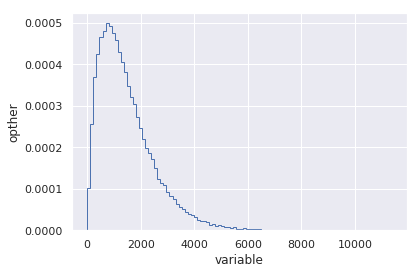

In [25]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715,100000)

# Make the histogram

_ = plt.hist(waiting_times,bins=100, density=True, histtype='step')

# Label axes

_ = plt.xlabel('variable')
_ = plt.ylabel('opther')

# Show the plot

plt.show()